<a href="https://colab.research.google.com/github/antosiant/Educational_tasks/blob/main/Split_test_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="font-size:1.5em; background-color: rgb(191, 191, 191); padding: 10px; width: 100%; display: inline-block;">
    <b>A/B Test analysis <br> Аналіз А/В тесту</b>
</div>

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import gdown

<div style="font-size:1.2em; padding: 10px; width: 100%; display: inline-block;">
     <b> Uploading a file of test data from Google Drive <br> Завантажуємо файл з даними тесту з гугл диску </b>
</div>

In [ ]:
url = 'https://drive.google.com/uc?id=1PMj_PSf9BXPohDsskv4qtGhquu_--9vi'
output = 'ab_test_data.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1PMj_PSf9BXPohDsskv4qtGhquu_--9vi
To: C:\Users\User\ab_test_data.csv
100%|█████████████████████████████████████████████████████████████████████████████| 1.36M/1.36M [00:00<00:00, 6.46MB/s]


'ab_test_data.csv'

In [ ]:
df = pd.read_csv('ab_test_data.csv')
df.head()

,user_id,timestamp,test_group,conversion
0,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-04 04:40:55.848109,a,0
1,e6a6e960-d3f3-4074-a516-ba1e609b211e,2023-07-06 00:26:45.486187,b,0
2,4d3fbfa5-6847-410a-bac2-477f01d5f400,2023-07-10 20:24:33.639464,b,0
3,361457d9-a044-48f7-981c-d67dc3861679,2023-07-20 07:04:49.957013,b,0
4,285cd63d-7d03-427f-a062-1fa2dd2e77d6,2023-07-19 23:27:50.116680,b,0


<div style="font-size:1.2em; padding: 10px; width: 100%; display: inline-block;">
    <b>Check the main statistical indicators for groups A and B <br> Перевіряємо основні статистичні показники для груп А та В</b>
</div>

In [ ]:
df.groupby('test_group').describe()

conversion                                             
                count      mean       std  min  25%  50%  75%  max
test_group                                                        
a             10013.0  0.061021  0.239380  0.0  0.0  0.0  0.0  1.0
b              9985.0  0.089034  0.284806  0.0  0.0  0.0  0.0  1.0

<div style="font-size:1.2em; padding: 10px; width: 100%; display: inline-block;">
    <b>A/B Test duration <br> Тривалість тесту</b>
</div>

In [ ]:
from IPython.display import display, HTML
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
start_date = df['date'].min()
end_date = df['date'].max()

duration = end_date - start_date
# Convert the duration into a convenient format (for example, in days)
# Перетворимо тривалість на зручний формат (наприклад, у дні)
duration_in_days = duration.days
display(HTML(f'<b> A/B Test duration is {duration_in_days} days </b>'))

<div style="font-size:1.2em; padding: 10px; width: 100%; display: inline-block;">
   <b> Before applying the t-test, let's check the equality of variances in both groups. Let's check using Levene's test. <br> Перед застосуванням t-тесту перевіримо рівність дисперсій в обох групах. Зробимо перевірку за допомогою тесту Левена. </b>
</div>

<div style="font-size:1.3em; background-color: rgb(191, 191, 191); padding: 10px; width: 100%; display: inline-block;">
    <b>Levene's test / Тест Левена </b>
</div>

In [ ]:
statistic, p_value = stats.levene(df[df['test_group']== 'a']['conversion'],
                                  df[df['test_group']== 'b']['conversion'])
display(HTML(f'<b> statistic: {round(statistic,3)}, p-value: {round(p_value, 3)} </b>'))
alpha = 0.05

if p_value < alpha:
    display(HTML(f'<b> The difference is statistically significant, Null Hypothesis is rejected.<br> Відмінність є статистично значнущою, нульову гіпотезу відкидаємо. </b>'))
else:
    display(HTML(f'<b> The difference is insignificant, Null Hypothesis cannot rejected.<br> Відмінність не є статистично значнущою, нульову гіпотезу не відкидаємо. </b>'))

<div style="font-size:1.3em; background-color: rgb(191, 191, 191); padding: 10px; width: 100%; display: inline-block; font-weight: bold">
    T-test / Тест Ст’юдента
</div>

In [ ]:
statistic, p_value = stats.ttest_ind(df[df['test_group']== 'a']['conversion'],
                                     df[df['test_group']== 'b']['conversion'],
                                     alternative = 'less')
display(HTML(f'<b> statistic: {round(statistic,2)}, p-value: {round(p_value, 2)}</b>'))
alpha = 0.05

if p_value < alpha:
    display(HTML(f'<b> The difference is statistically significant, Null Hypothesis is rejected.<br> Відмінність є статистично значнущою, нульову гіпотезу відкидаємо. </b>'))
else:
    display(HTML(f'<b> The difference is insignificant, Null Hypothesis cannot rejected.<br> Відмінність не є статистично значнущою, нульову гіпотезу не відкидаємо. </b>'))

<div style="font-size:1.3em; background-color: rgb(191, 191, 191); padding: 10px; width: 100%; display: inline-block; font-weight: bold">
    Z-test / Вальда Вольфовіца
</div>

In [ ]:
import statsmodels.api as sm

a_success = df[df['test_group'] == 'a']['conversion'].sum()
a_total = len(df[df['test_group'] == 'a'])
b_success = df[df['test_group'] == 'b']['conversion'].sum()
b_total = len(df[df['test_group'] == 'b'])

# z-test
z_stat, p_value = sm.stats.proportions_ztest([a_success, b_success], [a_total, b_total])

display(HTML(f"<b> z-statistics : {round(z_stat,3)}</b>"))
display(HTML(f"<b> p-value : {round(p_value,3)}</b>"))

alpha = 0.05
if p_value < alpha:
    display(HTML(f'<b> The difference is statistically significant, Null Hypothesis is rejected.<br> Відмінність є статистично значнущою, нульову гіпотезу відкидаємо. </b>'))
else:
    display(HTML(f'<b> The difference is insignificant, Null Hypothesis cannot rejected.<br> Відмінність не є статистично значнущою, нульову гіпотезу не відкидаємо. </b>'))

<div style="font-size:1.3em; background-color: rgb(191, 191, 191); padding: 10px; width: 100%; display: inline-block; font-weight: bold">
    Permutation test / Перестановний тест
</div>

<div style="font-size:1.2em; padding: 10px; width: 100%; display: inline-block;font-weight: bold">
    Null hypothesis: The distributions of the two samples are equal. <br> Alternative hypothesis: The distributions of the two samples are different.
</div>
<div style="font-size:1.2em; padding: 10px; width: 100%; display: inline-block;font-weight: bold">
    Нульова гіпотеза: Розподіли двох вибірок рівні. <br> Альтернативна гіпотеза: Розподіли двох вибірок різні.
</div>

In [ ]:
observed_difference = np.mean(df[df['test_group']== 'b']['conversion']) - np.mean(df[df['test_group']== 'a']['conversion'])
display(HTML(f"<b> mean b : {round(np.mean(df[df['test_group']== 'b']['conversion']),3)}</b>"))
display(HTML(f"<b> mean a : {round(np.mean(df[df['test_group']== 'a']['conversion']),3)}</b>"))
display(HTML(f"<b> difference between mean b and mean a : {round(observed_difference,3)}</b>"))

In [ ]:
a_size = df[df['test_group']== 'a']['test_group'].count()
b_size = df[df['test_group']== 'b']['test_group'].count()
display(HTML(f'<b> A size is {a_size}, B size is {b_size}</b>'))
# print(a_size, b_size)
all_users = df['conversion']
permutations_number = 1_000
simulated_diffs = []

for _ in range(permutations_number):

    users_shuffled = np.random.permutation(all_users)

    users_a_simulated = users_shuffled[:a_size]
    users_b_simulated = users_shuffled[a_size:]

    simulated_diff = np.abs(np.mean(users_b_simulated) - np.mean(users_a_simulated))
    simulated_diffs.append(simulated_diff)

display(HTML(f'<b> Number of different permutation simulations is {len(simulated_diffs)} </b>'))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<div style="font-size:1.2em; padding: 10px; width: 100%; display: inline-block;font-weight: bold">
    We estimate the probabilities of obtaining differences in average values group A and group B by random chance. <br> Null hypothesis: the resulting difference in conversions in group A and B is random. <br> Alternative hypothesis: the resulting difference in conversions in group A and B is not random. <br> Оцінюємо ймовірність отримання відмінностей у середніх значеннях конверсій групи А та групи В за випадковим шансом.<br> Нульова гіпотеза: отримана різниця конверсій групи А групі В випадкова.<br> Альтернативна гіпотеза: отримана різниця конверсій у групі А групі не є випадковою.
</div>

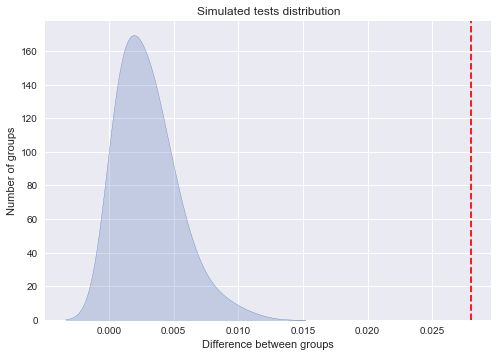

In [ ]:
plt.style.use('seaborn')
# Plot permutation simulations
density_plot = sns.kdeplot(simulated_diffs, fill=True, bw_adjust=2)
density_plot.set(
    xlabel='Difference between groups',
    ylabel='Number of groups',
    title ='Simulated tests distribution'
)

density_plot.axvline(
    x = observed_difference,
    color ='red',
    linestyle = '--'
)

plt.show()

<div style="font-size:1.2em; padding: 10px; width: 100%; display: inline-block;font-weight: bold">
    The distribution of the difference between the conversions of group B and group A of 1000 permutations is very far from the real difference in conversions. <br> Розподіл різниці конверсій групи В і групи А 1000 перестановок сильно віддалений від реальної різниці конверсій.
</div>

In [ ]:
diffs = np.array(simulated_diffs)
p_value = len( diffs[ diffs >= observed_difference ] ) / len(diffs)
print('p-value: ', p_value)
alpha = 0.05

if p_value < alpha:
    display(HTML(f'<b> The difference is statistically significant, Null Hypothesis is rejected.<br> Відмінність є статистично значнущою, нульову гіпотезу відкидаємо. </b>'))
else:
    display(HTML(f'<b> The difference is insignificant, Null Hypothesis cannot rejected.<br> Відмінність не є статистично значнущою, нульову гіпотезу не відкидаємо. </b>'))

p-value:  0.0


<div style="font-size:1.3em; background-color: rgb(191, 191, 191); padding: 10px; width: 100%; display: inline-block; font-weight: bold">
   Showing conversions over time / Відображення конверсій у часі
</div>

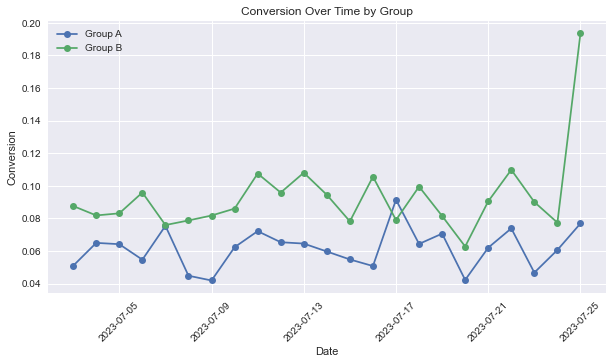

In [ ]:
# Filter data for group A
group_a_data = df[df['test_group'] == 'a']

# Filter data for group B
group_b_data = df[df['test_group'] == 'b']

# Group by date and calculate average conversion
conversion_by_date_a = group_a_data.groupby('date')['conversion'].mean()
conversion_by_date_b = group_b_data.groupby('date')['conversion'].mean()

# Display conversion by group
plt.figure(figsize=(10, 5))
plt.plot(conversion_by_date_a.index, conversion_by_date_a.values, marker='o', linestyle='-', label='Group A')
plt.plot(conversion_by_date_b.index, conversion_by_date_b.values, marker='o', linestyle='-', label='Group B')
plt.title('Conversion Over Time by Group')
plt.xlabel('Date')
plt.ylabel('Conversion')
plt.xticks(rotation=45)
plt.legend()
plt.show()